In [1]:
# !python utils/prepare_weights.py integrate checkpoints/spring/local/local-best-checkpoint-v3.ckpt ckpt/vimeo/init_global.ckpt configs/spring_op/uni_v15.yaml checkpoints/spring/uni.ckpt

In [1]:
import numpy as np
import cv2
import torch
from pytorch_lightning import seed_everything
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt
from test_utils import calculate_metrics
from src.test.test_codec import process_images

/data/maryam.sana/anaconda3/envs/unicontrol/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
/data/maryam.sana/anaconda3/envs/unicontrol/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


logging improved.
Enabled sliced_attention.
UniControlNet: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEffic

In [2]:
# Function to plot original vs predicted images and save the plot
def plot_images(original_images, predictions, save_location, start_index=4, end_index=9, dpi=300):
    fig, axes = plt.subplots(2, end_index - start_index, figsize=(30, 10))

    for i in range(start_index, end_index):
        axes[0, i - start_index].imshow(original_images[i])
        axes[0, i - start_index].set_title(f"Original {i + 1}")
        axes[0, i - start_index].axis('off')
        axes[1, i - start_index].imshow(predictions[i])
        axes[1, i - start_index].set_title(f"Prediction {i + 1}")
        axes[1, i - start_index].axis('off')

    plt.tight_layout()

    # Save the plot as a high-quality image
    plt.savefig(save_location, dpi=dpi, bbox_inches='tight')
    print(f"Plot saved at {save_location}")

    # Optionally close the figure to free up memory
    plt.close(fig)


# Function to calculate PSNR and MS-SSIM
def calculate_image_metrics(original_images, predictions):
    psnr_values = []
    mssim_values = []

    for orig_img, pred_img in zip(original_images, predictions):
        orig_pil = Image.fromarray(orig_img)
        pred_pil = Image.fromarray(pred_img)

        # Calculate PSNR and MS-SSIM
        psnr_value, mssim_value = calculate_metrics(orig_pil, [pred_pil])

        psnr_values.append(psnr_value)
        mssim_values.append(mssim_value)

    # Calculate mean metrics
    mean_psnr = np.mean(psnr_values)
    mean_mssim = np.mean(mssim_values)

    print(f"\nMean PSNR: {mean_psnr:.2f}")
    print(f"Mean MS-SSIM: {mean_mssim:.4f}")

    return mean_psnr, mean_mssim

In [3]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define folders for the images
original_folder = "data/UVG/Beauty"
op_folder = "data/UVG/optical_flow/Beauty"
previous_frame_folder = "data/UVG/Beauty/quality_8"
pred_folder = "pred_8"

# Retrieve image paths
image_paths = sorted(glob.glob(os.path.join(original_folder, "*.png")))  # Adjust extension if needed (e.g., .jpg)
op_paths = sorted(glob.glob(os.path.join(op_folder, "*.png")))     # Adjust extension if needed
previous_frames_paths = sorted(glob.glob(os.path.join(previous_frame_folder, "*.png")))  # Adjust extension if needed

# Define the prompt for processing
prompt = "A beautiful blonde girl with pink lipstick"

# Number of images you want to process
num_images = 15

# Call the function to process the images and get predictions
original_images, predictions = process_images(
    image_paths=image_paths,
    canny_paths=op_paths,
    prompt=prompt,
    previous_frames_paths=previous_frames_paths,
    pred_folder=pred_folder,
    num_images=num_images
)

Global seed set to 42


(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.58881873 0.55514455
 0.52153981 0.4881804  0.4552387

DDIM Sampler: 100%|███████████████████████████████████████████████| 50/50 [00:12<00:00,  3.92it/s]
Global seed set to 42


Saved prediction image: pred_8/im1_pred.png
(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.58881873

DDIM Sampler: 100%|███████████████████████████████████████████████| 50/50 [00:12<00:00,  4.02it/s]
Global seed set to 42


Saved prediction image: pred_8/im2_pred.png
(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.58881873

DDIM Sampler: 100%|███████████████████████████████████████████████| 50/50 [00:12<00:00,  4.02it/s]
Global seed set to 42


Saved prediction image: pred_8/im3_pred.png
(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.58881873

DDIM Sampler: 100%|███████████████████████████████████████████████| 50/50 [00:12<00:00,  4.03it/s]
Global seed set to 42


Saved prediction image: pred_8/im4_pred.png
(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.58881873

DDIM Sampler: 100%|███████████████████████████████████████████████| 50/50 [00:12<00:00,  4.02it/s]
Global seed set to 42


Saved prediction image: pred_8/im5_pred.png
(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.58881873

DDIM Sampler: 100%|███████████████████████████████████████████████| 50/50 [00:12<00:00,  3.97it/s]
Global seed set to 42


Saved prediction image: pred_8/im6_pred.png
(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.58881873

DDIM Sampler: 100%|███████████████████████████████████████████████| 50/50 [00:12<00:00,  3.98it/s]
Global seed set to 42


Saved prediction image: pred_8/im7_pred.png
(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.58881873

DDIM Sampler: 100%|███████████████████████████████████████████████| 50/50 [00:12<00:00,  3.97it/s]
Global seed set to 42


Saved prediction image: pred_8/im8_pred.png
(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.58881873

DDIM Sampler: 100%|███████████████████████████████████████████████| 50/50 [00:12<00:00,  3.96it/s]
Global seed set to 42


Saved prediction image: pred_8/im9_pred.png
(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.58881873

DDIM Sampler: 100%|███████████████████████████████████████████████| 50/50 [00:12<00:00,  3.98it/s]
Global seed set to 42


Saved prediction image: pred_8/im10_pred.png
(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.5888187

DDIM Sampler: 100%|███████████████████████████████████████████████| 50/50 [00:12<00:00,  3.95it/s]
Global seed set to 42


Saved prediction image: pred_8/im11_pred.png
(512, 512, 3)
(512, 512, 3)
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.62238538 0.5888187

DDIM Sampler:  28%|█████████████▏                                 | 14/50 [00:03<00:09,  3.82it/s]


KeyboardInterrupt: 

In [ ]:
plot_save_location = os.path.join(pred_folder, "original_vs_predicted.png")

# Plot the images and save the plot
plot_images(
    original_images=original_images,
    predictions=predictions,
    save_location=plot_save_location,
    start_index=4,  # Customize the range of images for plotting
    end_index=9,
    dpi=300
)

In [ ]:
from PIL import Image
import numpy as np
import torch
from pytorch_msssim import ms_ssim
from sklearn.metrics import mean_squared_error

# Function to calculate PSNR and MS-SSIM
def calculate_metrics(original, predicted):
    """
    Calculates PSNR and MS-SSIM between the original and predicted images.
    """
    # Resize images to ensure they meet the MS-SSIM size requirement
    original = original.resize((256, 256))
    predicted = predicted.resize((256, 256))

    # Convert images to numpy arrays and normalize
    original_array = np.array(original) / 255.0
    predicted_array = np.array(predicted) / 255.0

    # Calculate PSNR
    mse = mean_squared_error(original_array.flatten(), predicted_array.flatten())
    psnr = 20 * np.log10(1.0 / np.sqrt(mse)) if mse > 0 else float('inf')

    # Convert images to tensors
    original_tensor = torch.tensor(original_array).unsqueeze(0).permute(0, 3, 1, 2).float()
    predicted_tensor = torch.tensor(predicted_array).unsqueeze(0).permute(0, 3, 1, 2).float()

    # Calculate MS-SSIM
    mssim = ms_ssim(original_tensor, predicted_tensor, data_range=1.0).item()

    return psnr, mssim

# Example usage
im = Image.open('data/UVG/Beauty/im00001.png')
pred = Image.open('pred_8/im1_pred.png')

psnr_value, mssim_value = calculate_metrics(im, pred)
print(f"PSNR: {psnr_value:.2f}, MS-SSIM: {mssim_value:.4f}")

Figure saved as output_comparison.png


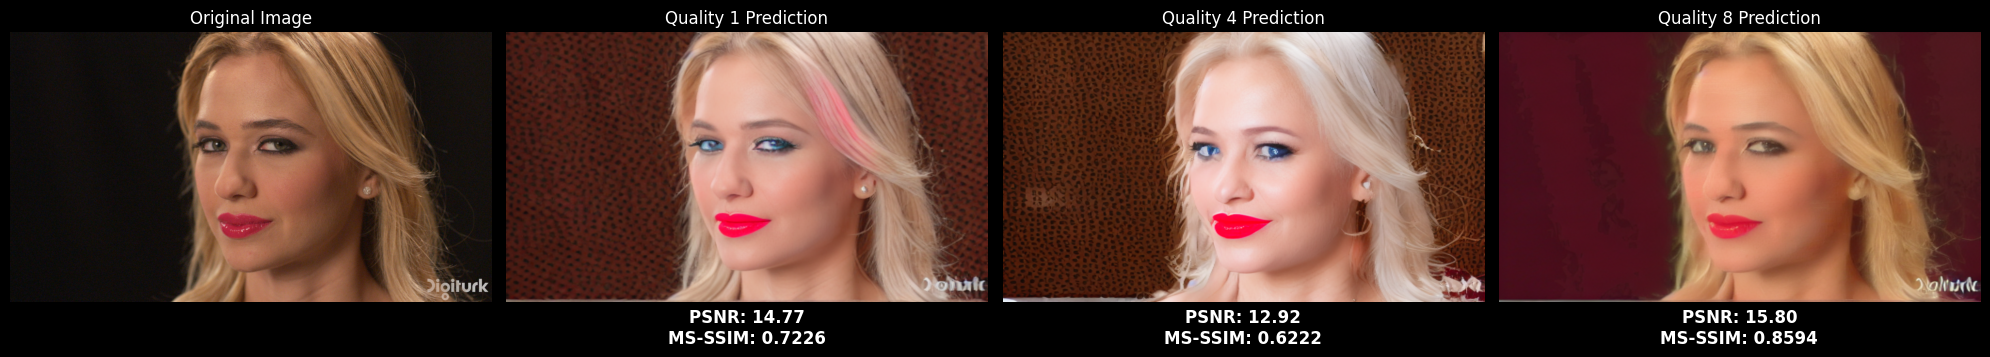

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

def display_high_res_plot(original_path, pred_q1_path, pred_q4_path, pred_q8_path, 
                          psnr_q1, mssim_q1, psnr_q4, mssim_q4, psnr_q8, mssim_q8, 
                          save_path='output_plot.png', figsize=(20, 15)):
    """
    Display a high resolution plot with original image and predictions for quality 1, 4, and 8.
    Also display PSNR and MS-SSIM values under each predicted image in bold.
    Save the plot with dpi=300.
    """
    # Load images
    original = Image.open(original_path)
    pred_q1 = Image.open(pred_q1_path)
    pred_q4 = Image.open(pred_q4_path)
    pred_q8 = Image.open(pred_q8_path)

    # Create a figure with high resolution and black background
    fig, axes = plt.subplots(1, 4, figsize=figsize)
    fig.patch.set_facecolor('black')  # Set background color to black

    # Set black background for individual axes
    for ax in axes:
        ax.set_facecolor('black')

    # Display original image
    axes[0].imshow(original)
    axes[0].set_title("Original Image", color='white')  # Title in white color
    axes[0].axis('off')

    # Display Quality 1 prediction
    axes[1].imshow(pred_q1)
    axes[1].set_title("Quality 1 Prediction", color='white')
    axes[1].axis('off')
    # Add PSNR and MS-SSIM as text under the image in bold and on two separate lines
    axes[1].text(0.5, -0.15, f"PSNR: {psnr_q1:.2f}\nMS-SSIM: {mssim_q1:.4f}", 
                 size=12, ha="center", color='white', transform=axes[1].transAxes, weight='bold')

    # Display Quality 4 prediction
    axes[2].imshow(pred_q4)
    axes[2].set_title("Quality 4 Prediction", color='white')
    axes[2].axis('off')
    # Add PSNR and MS-SSIM as text under the image in bold and on two separate lines
    axes[2].text(0.5, -0.15, f"PSNR: {psnr_q4:.2f}\nMS-SSIM: {mssim_q4:.4f}", 
                 size=12, ha="center", color='white', transform=axes[2].transAxes, weight='bold')

    # Display Quality 8 prediction
    axes[3].imshow(pred_q8)
    axes[3].set_title("Quality 8 Prediction", color='white')
    axes[3].axis('off')
    # Add PSNR and MS-SSIM as text under the image in bold and on two separate lines
    axes[3].text(0.5, -0.15, f"PSNR: {psnr_q8:.2f}\nMS-SSIM: {mssim_q8:.4f}", 
                 size=12, ha="center", color='white', transform=axes[3].transAxes, weight='bold')

    # Adjust layout for better display
    plt.tight_layout()

    # Save the plot with high DPI
    plt.savefig(save_path, dpi=300, facecolor=fig.get_facecolor())
    print(f"Figure saved as {save_path}")

    plt.show()

# Example usage
original_path = 'data/UVG/Beauty/im00004.png'
pred_q1_path = 'predictions_1/im4_pred.png'
pred_q4_path = 'predictions_4/im4_pred.png'
pred_q8_path = 'predictions_8/im4_pred.png'

# PSNR and MS-SSIM values for predictions (provided values)
psnr_q1, mssim_q1 = 14.77, 0.7226
psnr_q4, mssim_q4 = 12.92, 0.6222
psnr_q8, mssim_q8 = 15.80, 0.8594

# Call the function to display the images with metrics and save the plot
display_high_res_plot(original_path, pred_q1_path, pred_q4_path, pred_q8_path, 
                      psnr_q1, mssim_q1, psnr_q4, mssim_q4, psnr_q8, mssim_q8,
                      save_path='output_comparison.png')


In [7]:
# psnr_values = []
# mssim_values = []

# for orig_img, pred_img in zip(original_images[0:15], predictions[0:15]):
#     # Convert to PIL images for metric calculation
#     orig_pil = Image.fromarray(orig_img)
#     pred_pil = Image.fromarray(pred_img)
    
#     # Calculate metrics
#     psnr_value, mssim_value = calculate_metrics(orig_pil, [pred_pil])
    
#     # Store the results
#     psnr_values.append(psnr_value)
#     mssim_values.append(mssim_value)
    
#     # print(f"PSNR: {psnr_value:.2f}, MS-SSIM: {mssim_value:.4f}")

# # Calculate mean PSNR and MS-SSIM
# mean_psnr = np.mean(psnr_values)
# mean_mssim = np.mean(mssim_values)

# print(f"\nMean PSNR: {mean_psnr:.2f}")
# print(f"Mean MS-SSIM: {mean_mssim:.4f}")